# ** Final Graduation Project - TechCareer Data Science with Python Bootcamp

***Melis Bayındır***

* -Bu notebookta '(LoL) League of Legends Ranked Games' datasını inceleyerek çeşitli çıkarımlar, en sonunda da bu çıkarımlarımı inceleyerek oyun sonucunda kazanan takımı tahminleyecek 2 farklı model geliştirdim.
* İlk model ile datanın kendisinde bulunan ve oyunun başından son kısmına kadar olan bilgileri içeren sütunları modellemede kullanarak, oyun sürecindeki verilere göre hangi takımın kazandığını bilgisayara buldurtmak amacım. 
* İkinci modelimde ise, daha erken oyunda, sadece oyun öncesi kararlaştırılan şeyler ve oyuna ilk girildiğinde yaklaşık 5 dakika içerisinde elde edilecek bilgiler ile bilgisayarın oyun sonucunu tahmin etmesini sağlamak amacım.

# Data İnceleme

In [953]:
import matplotlib
import matplotlib
import numpy as np
import pandas as pd

In [954]:
df = pd.read_csv('/kaggle/input/league-of-legends/games.csv')
df.head(10)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
5,3287435705,1501667992132,2059,9,1,2,2,1,1,2,...,6,0,0,3,0,119,134,154,63,31
6,3314215542,1503430065724,1993,9,1,1,2,1,1,1,...,2,0,0,0,0,75,42,31,40,429
7,3329224025,1504472363684,1334,9,1,1,1,0,0,2,...,0,0,0,2,0,157,38,122,40,238
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,8,1,0,2,1,28,51,53,157,40
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,8,3,1,2,0,64,141,84,67,53


In [955]:
df.shape

(51490, 61)

In [956]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

* Game ID
* Creation Time (in Epoch format)
* Game Duration (in seconds)
* Season ID
* Winner (1 = team1, 2 = team2)
* First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
* Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
* The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
* The 5 bans of each team (Again, champion IDs are used)

League of Legends oyunundaki 50.000'den fazla sıralı EUW oyununun önemli datalarının yanı sıra şampiyon ve sihirdar büyü kimlikleri ve adlarını içeren json dosyaları bu data'da yer almaktadır. Her oyun için yukarıdaki alanlar vardır.

In [957]:
print(df.info())  #integer dışı column olmadığı için verileri incelemek için başlangıçta bir dönüştürme yapmak gerekmeyecek.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [958]:
print(df['seasonId'].value_counts()) #seasonId tüm datada aynı olduğu için ihtiyacım olmayacak bir column

seasonId
9    51490
Name: count, dtype: int64


In [959]:
#hero isimleri csv içinde id olarak yer alıyor, incelerken daha fazla görüş kazanabilmek için
#json dosyasından idlere karşılık heroları incelemek istiyorum.
import json
df_ = pd.read_json('/kaggle/input/league-of-legends/champion_info.json')
df_ 


,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."
...,...,...,...
91,champion,7.17.2,"{'title': 'the Blade's Shadow', 'id': 91, 'key..."
92,champion,7.17.2,"{'title': 'the Exile', 'id': 92, 'key': 'Riven..."
96,champion,7.17.2,"{'title': 'the Mouth of the Abyss', 'id': 96, ..."
98,champion,7.17.2,"{'title': 'the Eye of Twilight', 'id': 98, 'ke..."


In [960]:
#Burada da hero id ve name'i json içerisinden çekip dataframe haline getiriyorum.
def extract_values(dictionary):
    name = dictionary['name']
    idx = dictionary['id']
    return idx,name

df_[['id','name']] = df_['data'].apply(lambda x: pd.Series(extract_values(x)))
df_

,type,version,data,id,name
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A...",1,Annie
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K...",10,Kayle
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k...",101,Xerath
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':...",102,Shyvana
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k...",103,Ahri
...,...,...,...,...,...
91,champion,7.17.2,"{'title': 'the Blade's Shadow', 'id': 91, 'key...",91,Talon
92,champion,7.17.2,"{'title': 'the Exile', 'id': 92, 'key': 'Riven...",92,Riven
96,champion,7.17.2,"{'title': 'the Mouth of the Abyss', 'id': 96, ...",96,Kog'Maw
98,champion,7.17.2,"{'title': 'the Eye of Twilight', 'id': 98, 'ke...",98,Shen


In [961]:
#oluşturduğum döngü ile df haline getirdiğim id-name ikilisini, karşılık geren id lere göre 
#orijinal dataya champ_name şeklinde ekliyorum.
for i in ["t2_champ1id","t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_champ1id","t1_champ2id","t1_champ3id","t1_champ4id","t1_champ5id","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","t1_ban1","t1_ban2","t1_ban3","t1_ban4","t1_ban5"]:
    def replace_values(row, df_,i):

        a = row[i]
        try:
            name = df_.name[a]
        except:
            name = None
        return name

    # Apply the function to create a new column 't2_ban1_name'
    df[i+'_name'] = df.apply(lambda x: replace_values(x, df_,i), axis = 1)
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_ban1_name,t2_ban2_name,t2_ban3_name,t2_ban4_name,t2_ban5_name,t1_ban1_name,t1_ban2_name,t1_ban3_name,t1_ban4_name,t1_ban5_name
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Fiora,Vayne,Karma,Soraka,Caitlyn,Riven,Janna,Cassiopeia,Draven,Kayn
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Master Yi,Vayne,Zed,Caitlyn,Illaoi,Caitlyn,Darius,Teemo,Xayah,Warwick
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Yasuo,Zed,Kha'Zix,Maokai,Evelynn,Lulu,Janna,Twitch,Soraka,Blitzcrank
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Camille,Tristana,Kayn,Janna,Caitlyn,Zed,Vayne,Ornn,Fiora,Cho'Gath
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Garen,Master Yi,Braum,Darius,Tristana,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,Katarina,None,Malzahar,Zed,Yasuo,Fiora,Tristana,Master Yi,Yasuo,Rakan
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,Yasuo,Katarina,Draven,Zac,Fizz,Yasuo,Camille,Darius,Lux,Illaoi
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,Sejuani,Darius,Blitzcrank,Master Yi,Yasuo,Zed,Cho'Gath,Jax,Blitzcrank,Master Yi
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,Zac,Irelia,Caitlyn,Malzahar,Fiora,Draven,Lee Sin,Caitlyn,Yasuo,Twitch


In [962]:
#Oyunun oynandığı zaman csv'de epoch time şeklinde verilmiş, bunu date time formatına çeviriyorum.
import datetime

def convert_epoch_to_datetime(epoch_timestamp):
    epoch_seconds = epoch_timestamp / 1000
    normal_time = datetime.datetime.fromtimestamp(epoch_seconds)
    return normal_time

df['creation_time_normal'] = df['creationTime'].apply(lambda x: convert_epoch_to_datetime(x))
df['creation_time_normal']

0       2017-09-01 15:24:17.970
1       2017-06-19 05:06:43.862
2       2017-09-02 13:48:23.310
3       2017-09-02 10:35:03.996
4       2017-09-04 19:46:50.899
                  ...          
51485   2017-08-18 17:15:40.231
51486   2017-06-08 21:26:19.355
51487   2017-08-29 18:04:23.961
51488   2017-07-09 01:00:36.246
51489   2017-08-24 22:12:34.059
Name: creation_time_normal, Length: 51490, dtype: datetime64[ns]

In [963]:
#Aynı zamanda da her bir date-time formatının haftanın hangi gününe denk geldiğini 
#data hakkında çıkarım yaparken ve modellemede işime yarayacağı için orijinal dataya
#ekliyorum.
df['Day_name'] =df['creation_time_normal'].dt.strftime("%A")
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_ban3_name,t2_ban4_name,t2_ban5_name,t1_ban1_name,t1_ban2_name,t1_ban3_name,t1_ban4_name,t1_ban5_name,creation_time_normal,Day_name
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Karma,Soraka,Caitlyn,Riven,Janna,Cassiopeia,Draven,Kayn,2017-09-01 15:24:17.970,Friday
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Zed,Caitlyn,Illaoi,Caitlyn,Darius,Teemo,Xayah,Warwick,2017-06-19 05:06:43.862,Monday
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Kha'Zix,Maokai,Evelynn,Lulu,Janna,Twitch,Soraka,Blitzcrank,2017-09-02 13:48:23.310,Saturday
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Kayn,Janna,Caitlyn,Zed,Vayne,Ornn,Fiora,Cho'Gath,2017-09-02 10:35:03.996,Saturday
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Braum,Darius,Tristana,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,2017-09-04 19:46:50.899,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,Malzahar,Zed,Yasuo,Fiora,Tristana,Master Yi,Yasuo,Rakan,2017-08-18 17:15:40.231,Friday
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,Draven,Zac,Fizz,Yasuo,Camille,Darius,Lux,Illaoi,2017-06-08 21:26:19.355,Thursday
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,Blitzcrank,Master Yi,Yasuo,Zed,Cho'Gath,Jax,Blitzcrank,Master Yi,2017-08-29 18:04:23.961,Tuesday
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,Caitlyn,Malzahar,Fiora,Draven,Lee Sin,Caitlyn,Yasuo,Twitch,2017-07-09 01:00:36.246,Sunday


In [964]:
#Oyuncuların oyuna başlamadan aldıkları ekipmanların da sadece id'leri data'da yazdığı için,
#kahraman ismindeki işlemle aynı olarak önce jsondan çekip df yapıp, sonra orijinal dataya yeni columnlar
#olarak ekliyorum.
import json
df2 = pd.read_json('/kaggle/input/league-of-legends/summoner_spell_info.json')

df2[['id','name']] = df2['data'].apply(lambda x: pd.Series(extract_values(x)))
df2

,type,version,data,id,name
1,summoner,7.17.2,"{'id': 1, 'summonerLevel': 6, 'name': 'Cleanse...",1,Cleanse
11,summoner,7.17.2,"{'id': 11, 'summonerLevel': 10, 'name': 'Smite...",11,Smite
12,summoner,7.17.2,"{'id': 12, 'summonerLevel': 6, 'name': 'Telepo...",12,Teleport
13,summoner,7.17.2,"{'id': 13, 'summonerLevel': 1, 'name': 'Clarit...",13,Clarity
14,summoner,7.17.2,"{'id': 14, 'summonerLevel': 10, 'name': 'Ignit...",14,Ignite
21,summoner,7.17.2,"{'id': 21, 'summonerLevel': 4, 'name': 'Barrie...",21,Barrier
3,summoner,7.17.2,"{'id': 3, 'summonerLevel': 4, 'name': 'Exhaust...",3,Exhaust
30,summoner,7.17.2,"{'id': 30, 'summonerLevel': 1, 'name': 'To the...",30,To the King!
31,summoner,7.17.2,"{'id': 31, 'summonerLevel': 1, 'name': 'Poro T...",31,Poro Toss
32,summoner,7.17.2,"{'id': 32, 'summonerLevel': 1, 'name': 'Mark',...",32,Mark


In [965]:
spells=["t2_champ1_sum1","t2_champ1_sum2","t2_champ2_sum1","t2_champ2_sum2","t2_champ3_sum1",
          "t2_champ3_sum2","t2_champ4_sum1","t2_champ4_sum2","t2_champ5_sum1","t2_champ5_sum2",
          "t1_champ1_sum1","t1_champ1_sum2","t1_champ2_sum1","t1_champ2_sum2","t1_champ3_sum1",
          "t1_champ3_sum2","t1_champ4_sum1","t1_champ4_sum2","t1_champ5_sum1","t1_champ5_sum2",
         ]
for i in spells:
    def replace_values(row, df2,i):

        a = row[i]
        try:
            name = df2.name[a]
        except:
            name = None
        return name

    # Apply the function to create a new column 't2_ban1_name'
    df[i+'_name'] = df.apply(lambda x: replace_values(x, df2,i), axis = 1)
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1_sum1_name,t1_champ1_sum2_name,t1_champ2_sum1_name,t1_champ2_sum2_name,t1_champ3_sum1_name,t1_champ3_sum2_name,t1_champ4_sum1_name,t1_champ4_sum2_name,t1_champ5_sum1_name,t1_champ5_sum2_name
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,Teleport,Flash,Flash,Heal,Flash,Ignite,Flash,Ignite,Flash,Smite
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,Flash,Ignite,Flash,Smite,Teleport,Flash,Ignite,Flash,Flash,Heal
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,Smite,Flash,Heal,Flash,Exhaust,Flash,Teleport,Flash,Flash,Teleport
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,Smite,Flash,Flash,Heal,Flash,Teleport,Flash,Exhaust,Flash,Ignite


In [966]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1_sum1_name,t1_champ1_sum2_name,t1_champ2_sum1_name,t1_champ2_sum2_name,t1_champ3_sum1_name,t1_champ3_sum2_name,t1_champ4_sum1_name,t1_champ4_sum2_name,t1_champ5_sum1_name,t1_champ5_sum2_name
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash


Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5'],
      dtype='object')

In [967]:
#ileride incelememi çok fazla column ile zorlaştırmamak için id columnlarını,
#epoch time sütununu, season ıd sütununu ve game ıd sütununu düşürüyorum.düşürüyorum.
df_model = df.copy() #--> ileride id sütunları lazım olabilir diye düşürmeden yedek df oluşturuyorum.
df = df.drop(columns = ['gameId','creationTime','seasonId','t1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 
                         't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 
                         't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id',
                         't1_champ5_sum1', 't1_champ5_sum2','t1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 
                         't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 
                         't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 
                         't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
                        't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5'], axis=1)


# **Data Visualization**

In [968]:
import matplotlib.pyplot as plt
import seaborn as sns

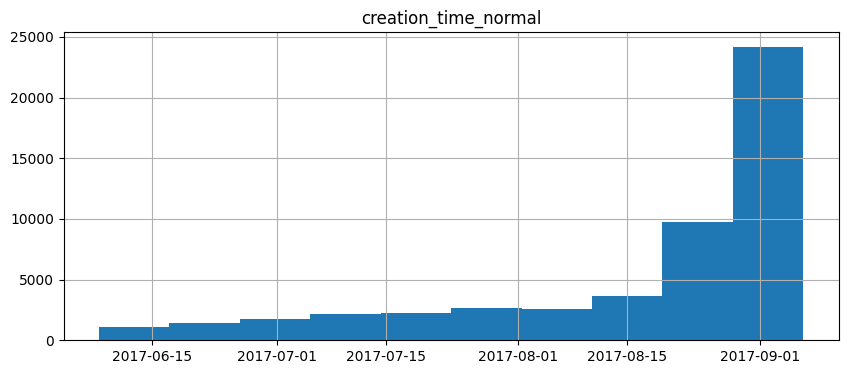

In [969]:
#Bu görselleştirmeden emin olmasam da tarihlere göre oynanma sayılarını görmek istedim.
#Doğru yaptıysam :) iki sonuç çıkabileceğini düşünüyorum:
# 1. sonuç--> oyunun ilerleyen zamanlarında popülerliğinin ciddi ölçüde artmış olması.
#2. sonuç --> oluşturulan csv, oynanan oyunların datalarını yeni zamanlıları daha çok göstermek üzere 
#oluşturuldu, tüm zamanı göstermiyor.
features = ["creation_time_normal"]
df[features].hist(figsize=(10, 4));

In [970]:
df['creation_time_normal'].value_counts().head(20)
#Burada ilginç bir şekilde saniyesine kadar aynı anda oluşturulmuş oyunların varlığını gözlemledim.

creation_time_normal
2017-09-04 20:11:58.682    3
2017-09-05 18:04:27.164    3
2017-09-05 21:14:05.817    3
2017-09-02 23:27:55.640    3
2017-09-02 19:27:11.622    3
2017-09-02 21:11:39.989    3
2017-09-05 17:24:18.491    3
2017-09-02 20:20:01.683    3
2017-08-29 13:33:40.493    3
2017-08-29 12:55:43.496    3
2017-09-02 19:09:48.674    3
2017-09-03 14:28:42.220    3
2017-09-05 20:32:30.766    3
2017-08-20 20:01:59.685    2
2017-09-01 18:03:09.103    2
2017-09-03 12:50:25.793    2
2017-07-19 13:45:10.322    2
2017-08-25 20:35:34.397    2
2017-09-01 11:34:40.611    2
2017-08-31 11:12:17.122    2
Name: count, dtype: int64

In [971]:
time = df.set_index('creation_time_normal')
time.head()
#görselleştirmeye yardımcı olmak adına time'ı index sütunu yaptım.

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,...,t1_champ1_sum1_name,t1_champ1_sum2_name,t1_champ2_sum1_name,t1_champ2_sum2_name,t1_champ3_sum1_name,t1_champ3_sum2_name,t1_champ4_sum1_name,t1_champ4_sum2_name,t1_champ5_sum1_name,t1_champ5_sum2_name
creation_time_normal,,,,,,,,,,,,,,,,,,,,,
2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,11,1,...,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite
2017-06-19 05:06:43.862,1851,1,1,1,1,0,1,1,10,4,...,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite
2017-09-02 13:48:23.310,1493,1,2,1,1,1,2,0,8,1,...,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash
2017-09-02 10:35:03.996,1758,1,1,1,1,1,1,0,9,2,...,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash
2017-09-04 19:46:50.899,2094,1,2,1,1,1,1,0,9,2,...,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash


In [972]:
#Month ve day olmak üzere iki sütun daha ekledim.
df['Month'] = time.index.month
df['Day'] = time.index.day
df

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,...,t1_champ2_sum1_name,t1_champ2_sum2_name,t1_champ3_sum1_name,t1_champ3_sum2_name,t1_champ4_sum1_name,t1_champ4_sum2_name,t1_champ5_sum1_name,t1_champ5_sum2_name,Month,Day
0,1949,1,2,1,1,1,1,2,11,1,...,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,9,1
1,1851,1,1,1,1,0,1,1,10,4,...,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,6,19
2,1493,1,2,1,1,1,2,0,8,1,...,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,9,2
3,1758,1,1,1,1,1,1,0,9,2,...,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,9,2
4,2094,1,2,1,1,1,1,0,9,2,...,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,2,0,...,Flash,Heal,Flash,Ignite,Flash,Ignite,Flash,Smite,8,18
51486,3304,2,1,1,2,2,2,2,5,4,...,Flash,Smite,Teleport,Flash,Ignite,Flash,Flash,Heal,6,8
51487,2156,2,2,2,2,0,1,0,0,0,...,Heal,Flash,Exhaust,Flash,Teleport,Flash,Flash,Teleport,8,29
51488,1475,2,2,2,2,0,2,0,0,0,...,Flash,Heal,Flash,Teleport,Flash,Exhaust,Flash,Ignite,7,9


In [973]:
#Haftanın günlerine göre oyun sayılarının dağılımlarını gözlemledim. Sonrasında da 
#bu bilgiyi görselleştirdim.
pd.DataFrame(df['Day_name'].value_counts())

,count
Day_name,
Sunday,9094
Monday,8713
Tuesday,7699
Saturday,7526
Friday,6521
Thursday,6220
Wednesday,5717


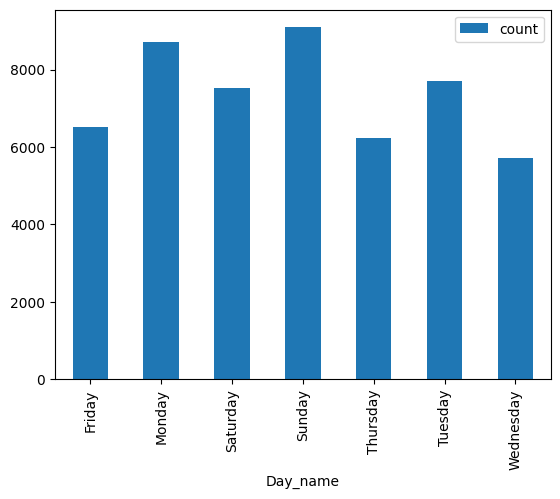

In [974]:
ax = pd.DataFrame(df['Day_name'].value_counts()).sort_values('Day_name').plot.bar(color='C0')

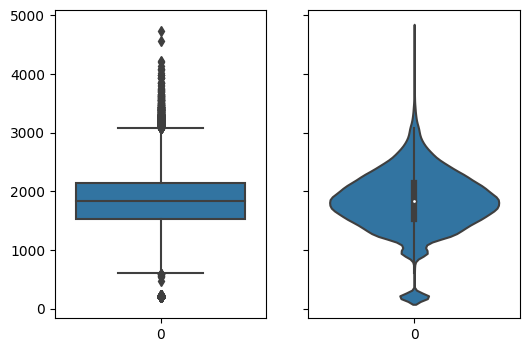

In [975]:
#oyun oynanma sürelerinin dağılımını incelemek istedim. Çok kısa süren oyunlar ve çok uzun süren oyunlar!!!
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["gameDuration"], ax=axes[0])
sns.violinplot(data=df["gameDuration"], ax=axes[1]);

In [976]:
df.gameDuration.mean()/60#oyunlar ortalama 31 dk sürüyormuş.

30.539380138538228

In [977]:
Q1 = np.quantile(df['gameDuration'], 0.025)
Q1 #oyunun başında teslim olma, afk kalma vs durumlarının belirleyici olmayacağını düşünüyorum

869.0

In [978]:
df = df[df.gameDuration > Q1]#yukarıdaki düşüncemden ötürü bu durumları çıkartıyorum.


In [979]:
Q1 = np.quantile(df['gameDuration'], 0.025)
Q1

1056.0

In [980]:
df['gameDuration'].mean()

1873.2450150395412

In [981]:
#oyunda en çok tercih edilen/kullanılan karakter büyülerinin bir listesini oluşturuyorum.
#(totalde 20 columnu birleştirerek yapıyorum)
spells=['t2_champ1_sum1_name', 't2_champ1_sum2_name', 't2_champ2_sum1_name',
       't2_champ2_sum2_name', 't2_champ3_sum1_name', 't2_champ3_sum2_name',
       't2_champ4_sum1_name', 't2_champ4_sum2_name', 't2_champ5_sum1_name',
       't2_champ5_sum2_name', 't1_champ1_sum1_name', 't1_champ1_sum2_name',
       't1_champ2_sum1_name', 't1_champ2_sum2_name', 't1_champ3_sum1_name',
       't1_champ3_sum2_name', 't1_champ4_sum1_name', 't1_champ4_sum2_name',
       't1_champ5_sum1_name', 't1_champ5_sum2_name']
spell_df= pd.DataFrame(np.array(df[spells].values.tolist()).ravel())
spell_df


,0
0,Smite
1,Flash
2,Flash
3,Heal
4,Ghost
...,...
1004015,Teleport
1004016,Smite
1004017,Flash
1004018,Flash


([<matplotlib.patches.Wedge at 0x7b843fae0ee0>,
 [Text(0.036026983775061576, 1.099409867356152, "('Flash',)"),
  Text(-1.0606807002177907, -0.29147290128843406, "('Teleport',)"),
  Text(-0.6562984497539801, -0.8827640369037032, "('Heal',)"),
  Text(0.005362458293109508, -1.0999869290319113, "('Smite',)"),
  Text(0.61058982783599, -0.9149754434645863, "('Ignite',)"),
  Text(0.9879300892893772, -0.48372940646262486, "('Exhaust',)"),
  Text(1.0873347476354611, -0.1664426224995523, "('Barrier',)"),
  Text(1.0978284047665703, -0.06908540864529675, "('Ghost',)"),
  Text(1.09994904933943, -0.010587202524008755, "('Cleanse',)")],
 [Text(0.019651082059124494, 0.599678109466992, '49.0%\n(491541)'),
  Text(-0.5785531092097039, -0.15898521888460038, '10.6%\n(106645)'),
  Text(-0.35798097259308, -0.481507656492929, '10.5%\n(105344)'),
  Text(0.0029249772507870036, -0.5999928703810424, '10.0%\n(100528)'),
  Text(0.3330489970014491, -0.49907751461704697, '8.6%\n(85980)'),
  Text(0.5388709577942057, -

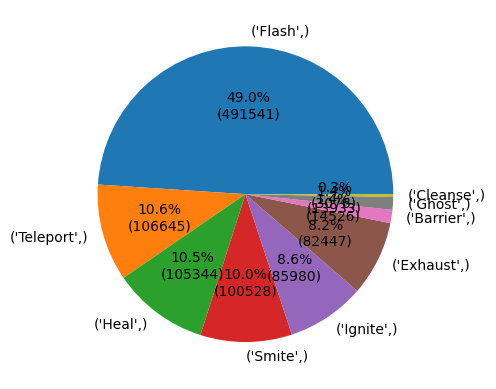

In [982]:
#büyüleri tercih edilme oranlarına göre bir pie chart içerisinde gösteriyorum.
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = spell_df.value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

In [983]:
#oyunda en çok tercih edilen/kullanılan karakterlerin bir listesini oluşturuyorum.
#(totalde 10 columnu birleştirerek yapıyorum)
champions= ['t2_champ1id_name', 't2_champ2id_name', 't2_champ3id_name',
            't2_champ4id_name', 't2_champ5id_name', 't1_champ1id_name',
            't1_champ2id_name', 't1_champ3id_name', 't1_champ4id_name',
            't1_champ5id_name',]
champions_df= pd.DataFrame({'champ': np.array(df[champions].values.tolist()).ravel()})

champions_df

,champ
0,Graves
1,Xayah
2,Darius
3,Zed
4,Thresh
...,...
502005,Leona
502006,Annie
502007,Camille
502008,Sejuani


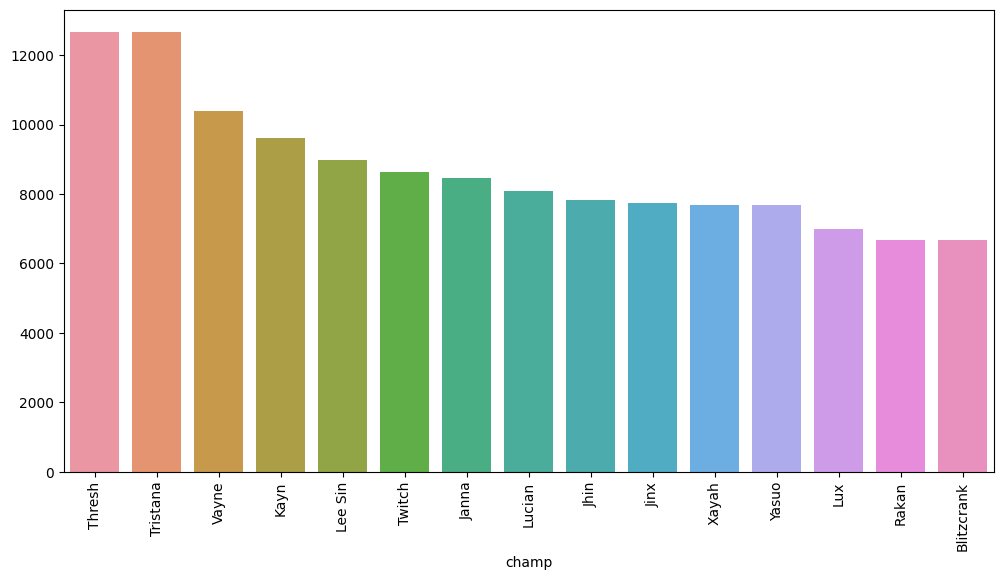

In [984]:
#140 civarı karakter arasından en çok kullanılan 15 karakterin kullanılma oranlarını gösteren bar plot.
top_15_used_champs = champions_df['champ'].value_counts().head(15)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_15_used_champs.index, y=top_15_used_champs.values)

plt.xticks(rotation=90)


plt.show()

In [985]:
#en çok banlanan karakterlerin listesi
banned_champions= ['t2_ban4_name', 't2_ban5_name', 't2_ban1_name', 't2_ban2_name',
                   't2_ban3_name', 't1_ban4_name', 't1_ban5_name','t2_ban1_name', 't2_ban2_name',
                   't2_ban3_name', 't1_ban4_name']
banned_champions_df= pd.DataFrame({'champ': np.array(df[banned_champions].values.tolist()).ravel()})

banned_champions_df

,champ
0,Soraka
1,Caitlyn
2,Fiora
3,Vayne
4,Karma
...,...
552206,Lulu
552207,Master Yi
552208,Yasuo
552209,Kayn


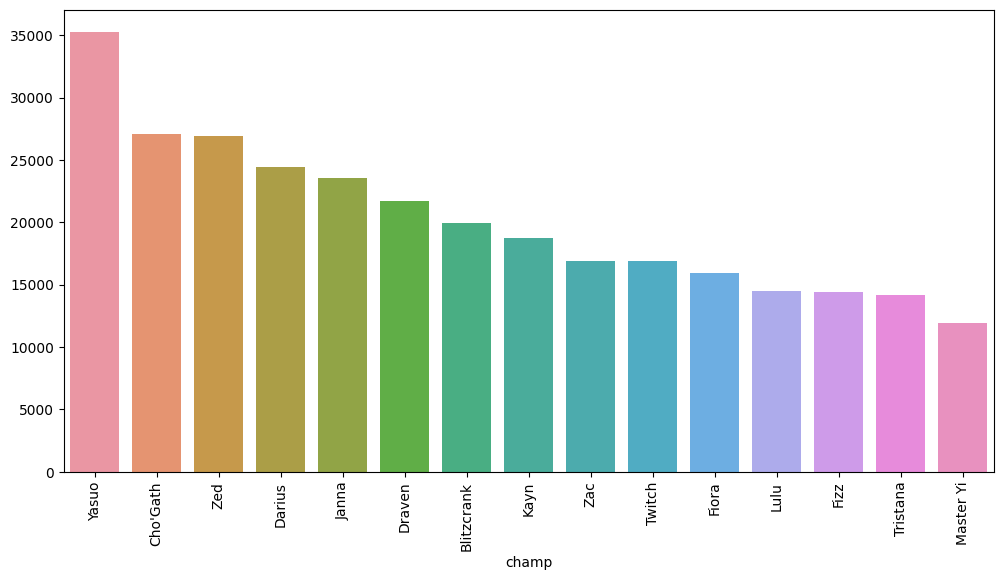

In [986]:
#140 civarı karakter arasından en çok banlanan 15 karakterin kullanılma oranlarını gösteren bar plot.
top_15_banned_champs = banned_champions_df['champ'].value_counts().head(15)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_15_banned_champs.index, y=top_15_banned_champs.values)

plt.xticks(rotation=90)


plt.show()

Text(0.5, 1.0, 'Most win rate 20 characters')

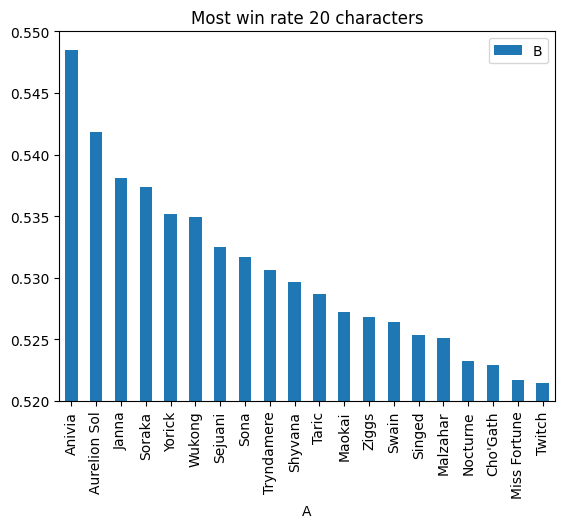

In [1039]:
t2_champs = df[['t2_champ1id_name', 't2_champ2id_name', 't2_champ3id_name',
               't2_champ4id_name', 't2_champ5id_name','winner']]
#Karakterlerin kazanma oranlarına göre karşılaştırdığım barplot.
win_rate_c=[]
for i in df_.name.to_list():
    m = t2_champs.eq(i).sum(axis = 1)

    a = t2_champs[m == 1]
    win_rate_c.append(a['winner'].mean()-1)
abc=pd.DataFrame({'A': df_.name.to_list(), 'B': win_rate_c} )
abc.sort_values('B', ascending=False, inplace=True)

abc.head(20).plot.bar(x='A', y='B')
plt.ylim(0.52, 0.55)
plt.title("Most win rate 20 characters") 

 # ** Sorular**

**Beginner Seviyesi**

1. Takım 2'de ilk olarak tercih edilen ve banlanan karakterlerin sayıları nedir?

In [988]:
print(df['t2_champ1id_name'].value_counts()) 
print(df['t2_ban5_name'].value_counts()) 

t2_champ1id_name
Tristana        1228
Thresh          1214
Vayne           1048
Kayn             939
Lee Sin          876
                ... 
Lissandra        105
Ivern             97
Aurelion Sol      87
Aatrox            76
Skarner           62
Name: count, Length: 138, dtype: int64
t2_ban5_name
Yasuo       3074
Zed         2528
Cho'Gath    2486
Janna       2230
Darius      2152
            ... 
Ryze          11
Udyr          11
Varus          9
Skarner        8
Sion           7
Name: count, Length: 138, dtype: int64


2. Oyunların oynanış sürelerin ortalama, minimum ve maksimum değerleri kaç dakikadır?

In [989]:
print(df['gameDuration'].mean()/60) #Ortalama oyun kaç dakika sürmüş
print(df['gameDuration'].min()/60) #Min değerler -> box-plot ile aşırı aykırı değer olma ihtimali incelenebilir.
print(df['gameDuration'].max()/60) #Max değerler

31.22075025065902
14.516666666666667
78.8


3. Hangi takım daha fazla maç almıştır?

In [990]:
df['winner'].value_counts()

winner
1    25396
2    24805
Name: count, dtype: int64

4. Her bir takımın maç boyunca aldığı kule sayısı ortalaması nasıldır?(t1_towerKills)

In [991]:
print(df['t1_towerKills'].mean())
print(df['t2_towerKills'].mean())

5.8362980817115195
5.687456425170813


5. 1.Takımın aldığı toplam kulelerin dağılımı nasıldır?

In [992]:
df['t1_towerKills'].describe()

count    50201.000000
mean         5.836298
std          3.740882
min          0.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: t1_towerKills, dtype: float64

6. 2 . Takım kaç defa ilk kuleyi alarak oyun kazanmıştır?

In [993]:
print(df[df['firstTower']==2]['winner'].value_counts())

winner
2    17259
1     7129
Name: count, dtype: int64


7. İlk 'Rift Heraldı' almanın dağılımı nasıldır? Hiç almayan takım var mı?

In [994]:
print(df['firstRiftHerald'].value_counts())

firstRiftHerald
0    24899
1    12946
2    12356
Name: count, dtype: int64


8. Bir maç sırasında maximum kaç tane inhibitor alınmış?


In [995]:
df['t1_inhibitorKills'].describe()

count    50201.000000
mean         1.042111
std          1.269807
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: t1_inhibitorKills, dtype: float64

9. Maximum inhibitor alındığında maç kaç dk sürmüş?

In [996]:
df['t1_inhibitorKills'].idxmax()

17740

In [997]:
df.loc[17740]

gameDuration               3858
winner                        1
firstBlood                    2
firstTower                    2
firstInhibitor                1
                         ...   
t1_champ4_sum2_name    Teleport
t1_champ5_sum1_name       Flash
t1_champ5_sum2_name        Heal
Month                         8
Day                          31
Name: 17740, Length: 62, dtype: object

In [998]:
3858/60

64.3

10. En uzun süren oyunda iki takım da kaçar tane kule almışlar?

In [999]:
df['gameDuration'].idxmax()

30524

In [1000]:
print('Takım 1 -->' ,df.loc[30524,'t1_towerKills'])
print('Takım 2 -->' ,df.loc[30524,'t2_towerKills'])

Takım 1 --> 7
Takım 2 --> 11


**Intermadiate**

1. İlk kanı 1. veya 2. takımın dökmesine göre kazanan takımların dağılımları nasıl değişir?

In [1001]:
print(df[df['firstBlood']==2]['winner'].value_counts())
print(df[df['firstBlood']==1]['winner'].value_counts())

winner
2    14349
1    10124
Name: count, dtype: int64
winner
1    15272
2    10456
Name: count, dtype: int64


2. İlk sorudaki şeyi ilk kuleyi almak, ilk ejderha, ilk baron, ilk riftherald ve ilk inhibitör için incele.

In [1002]:
print(df[df['firstTower']==2]['winner'].value_counts())
print(df[df['firstTower']==1]['winner'].value_counts())

winner
2    17259
1     7129
Name: count, dtype: int64
winner
1    18254
2     7541
Name: count, dtype: int64


In [1003]:
print(df[df['firstInhibitor']==2]['winner'].value_counts())
print(df[df['firstInhibitor']==1]['winner'].value_counts())

winner
2    20214
1     1918
Name: count, dtype: int64
winner
1    20883
2     2105
Name: count, dtype: int64


In [1004]:
print(df[df['firstBaron']==2]['winner'].value_counts())
print(df[df['firstBaron']==1]['winner'].value_counts())

winner
2    13219
1     3255
Name: count, dtype: int64
winner
1    11978
2     2780
Name: count, dtype: int64


In [1005]:
print(df[df['firstDragon']==2]['winner'].value_counts())
print(df[df['firstDragon']==1]['winner'].value_counts())

winner
2    16723
1     8067
Name: count, dtype: int64
winner
1    16908
2     7752
Name: count, dtype: int64


In [1006]:
print(df[df['firstRiftHerald']==2]['winner'].value_counts())
print(df[df['firstRiftHerald']==1]['winner'].value_counts())

winner
2    8582
1    3774
Name: count, dtype: int64
winner
1    8991
2    3955
Name: count, dtype: int64


3. İlk Rift Heraldı alan takımın ilk kuleyi de almış olmasına etkisi nasıl dağılır?(rift herald kulelere vuran bir canavar)

In [1007]:
print('Takım 1 aldıysa', df[df['firstRiftHerald']==1]['firstTower'].value_counts())
print('Takım 2 aldıysa', df[df['firstRiftHerald']==2]['firstTower'].value_counts())

Takım 1 aldıysa firstTower
1    9395
2    3551
Name: count, dtype: int64
Takım 2 aldıysa firstTower
2    8846
1    3509
0       1
Name: count, dtype: int64


4. Takım 2'de en çok oynanan karakter, Thresh bulunmaktadır. Maçların kazanılma oranları nasıl dağılır?

In [1008]:
t2_champs = df[['t2_champ1id_name', 't2_champ2id_name', 't2_champ3id_name',
               't2_champ4id_name', 't2_champ5id_name','winner']]

m = t2_champs.eq('Thresh').sum(axis = 1)

a = t2_champs[m == 1] 
a['winner'].value_counts()

winner
1    3389
2    2977
Name: count, dtype: int64

5. Takım 2'de en çok banlanan karakter, Yasuo bulunmaktadır. Takım 2'nin kazanma yüzdesi nedir?

In [1009]:
m = t2_champs.eq('Yasuo').sum(axis = 1)

a = t2_champs[m == 1] 
a['winner'].mean()-1 #İçinde en çok banlanan karakter(Yasuo) bulunan Takım 2'nin kazanma yüzdesi

0.49557752341311123

6. Info: Smite(Çarp) genel LOL oyunları mantığında her bir takımda tek bir karakterin alması gereken bir sihirdar büyüsüdür. Takım 1 ve 2 de her bir oyun içinde toplam alınan Smite büyülerinin sayısının dağılımı nasıldır?


In [1010]:
m = (df.eq('Smite')).sum(axis = 1)
m.value_counts()

2    49267
3      505
1      411
4       14
6        2
0        2
Name: count, dtype: int64

7. Her iki takımda da çarp büyüsünü sadece tek bir kere almayanların sayısı kaçtır?(yani tek rowda 2 den farklı bulunması

In [1011]:
n = df[m != 2]
n.shape

(934, 62)

In [1012]:
smite_check = n[['winner','t2_champ1_sum1_name','t2_champ2_sum1_name','t2_champ3_sum1_name','t2_champ4_sum1_name','t2_champ5_sum1_name',
               't2_champ1_sum2_name','t2_champ2_sum2_name','t2_champ3_sum2_name','t2_champ4_sum2_name','t2_champ5_sum2_name']]
smite_check

,winner,t2_champ1_sum1_name,t2_champ2_sum1_name,t2_champ3_sum1_name,t2_champ4_sum1_name,t2_champ5_sum1_name,t2_champ1_sum2_name,t2_champ2_sum2_name,t2_champ3_sum2_name,t2_champ4_sum2_name,t2_champ5_sum2_name
147,2,Flash,Flash,Exhaust,Flash,Smite,Heal,Teleport,Flash,Cleanse,Flash
169,1,Heal,Ignite,Teleport,Flash,Ignite,Flash,Flash,Ghost,Exhaust,Flash
372,2,Flash,Flash,Flash,Flash,Flash,Smite,Ignite,Teleport,Heal,Ignite
697,2,Flash,Flash,Smite,Ignite,Teleport,Exhaust,Heal,Flash,Flash,Flash
706,2,Ghost,Flash,Smite,Flash,Flash,Teleport,Heal,Flash,Exhaust,Barrier
...,...,...,...,...,...,...,...,...,...,...,...
51288,2,Heal,Flash,Flash,Flash,Flash,Flash,Teleport,Smite,Exhaust,Ignite
51300,2,Flash,Flash,Heal,Flash,Flash,Barrier,Teleport,Flash,Exhaust,Heal
51305,2,Exhaust,Flash,Heal,Flash,Flash,Flash,Smite,Flash,Ignite,Teleport
51413,2,Exhaust,Ignite,Flash,Heal,Teleport,Flash,Flash,Smite,Flash,Flash


8. Takım 2 de olup takım üyelerinden sadece birisinin smite kullanması durumundaki kazanma dağılımları nasıldır?

In [1013]:
m = (smite_check.eq('Smite')).sum(axis = 1)
a = smite_check[m == 1] 
a['winner'].value_counts()

winner
2    281
1    175
Name: count, dtype: int64

9. Takım 1 de olup takım üyelerinden sadece birisinin smite kullanması durumundaki kazanma dağılımları nasıldır?

In [1014]:
smite_check = n[['winner','t1_champ1_sum1_name','t1_champ2_sum1_name','t1_champ3_sum1_name','t1_champ4_sum1_name','t1_champ5_sum1_name',
                't1_champ1_sum2_name','t1_champ2_sum2_name','t1_champ3_sum2_name','t1_champ4_sum2_name','t1_champ5_sum2_name']]
smite_check

,winner,t1_champ1_sum1_name,t1_champ2_sum1_name,t1_champ3_sum1_name,t1_champ4_sum1_name,t1_champ5_sum1_name,t1_champ1_sum2_name,t1_champ2_sum2_name,t1_champ3_sum2_name,t1_champ4_sum2_name,t1_champ5_sum2_name
147,2,Teleport,Exhaust,Flash,Flash,Heal,Flash,Flash,Ignite,Teleport,Flash
169,1,Teleport,Flash,Flash,Flash,Flash,Flash,Teleport,Exhaust,Smite,Heal
372,2,Flash,Flash,Smite,Smite,Teleport,Heal,Exhaust,Flash,Flash,Flash
697,2,Ignite,Flash,Heal,Flash,Heal,Flash,Teleport,Flash,Exhaust,Flash
706,2,Smite,Flash,Flash,Heal,Flash,Flash,Exhaust,Smite,Flash,Teleport
...,...,...,...,...,...,...,...,...,...,...,...
51288,2,Flash,Flash,Flash,Flash,Flash,Teleport,Teleport,Exhaust,Heal,Teleport
51300,2,Smite,Flash,Exhaust,Flash,Heal,Flash,Ignite,Flash,Teleport,Flash
51305,2,Flash,Flash,Ignite,Flash,Flash,Ignite,Teleport,Flash,Smite,Smite
51413,2,Exhaust,Smite,Flash,Flash,Flash,Flash,Flash,Teleport,Smite,Exhaust


In [1015]:
m = (smite_check.eq('Smite')).sum(axis = 1)
n = smite_check[m == 1] #takım 1 de olup takım üyelerinden sadece birisinin smite kullanması durumundaki kazanma oranları
n['winner'].value_counts()

winner
1    294
2    180
Name: count, dtype: int64

10. Kazanma oranı en yüksek ilk 5 karakter kimdir?

In [1016]:
t2_champs = df[['t2_champ1id_name', 't2_champ2id_name', 't2_champ3id_name',
               't2_champ4id_name', 't2_champ5id_name','winner']]
win_rate_c=[]
for i in df_.name.to_list():
    m = t2_champs.eq(i).sum(axis = 1)

    a = t2_champs[m == 1]
    win_rate_c.append(a['winner'].mean()-1)
abc=pd.DataFrame({'A': df_.name.to_list(), 'B': win_rate_c} )
abc.sort_values('B', ascending=False, inplace=True)
abc.head(5)

,A,B
72,Anivia,0.548504
28,Aurelion Sol,0.541860
79,Janna,0.538098
36,Soraka,0.537333
126,Yorick,0.535211


# Modelleme

In [1017]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [1018]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Columns: 103 entries, gameId to t1_champ5_sum2_name
dtypes: datetime64[ns](1), int64(61), object(41)
memory usage: 40.5+ MB


In [1019]:
df_model.dropna(inplace=True)

<Axes: >

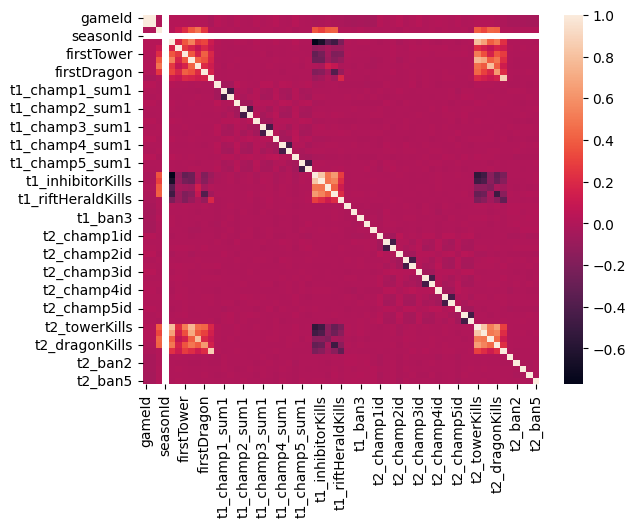

In [1020]:
corr = df_model.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [1021]:
Q1 = np.quantile(df_model['gameDuration'], 0.025)
Q1 #oyunun başında teslim olma, afk kalma vs durumlarının belirleyici olmayacağını düşünüyorum

df_model = df_model[df_model.gameDuration > Q1]

Q1 = np.quantile(df_model['gameDuration'], 0.025)
Q1

1064.0

In [1022]:
df_model2 = df_model
df_model = df_model.drop(columns = ['gameId','creationTime','seasonId','t1_champ1id_name', 't1_champ1_sum1_name', 't1_champ1_sum2_name', 
                         't1_champ2id_name', 't1_champ2_sum1_name', 't1_champ2_sum2_name', 't1_champ3id_name', 't1_champ3_sum1_name', 
                         't1_champ3_sum2_name', 't1_champ4id_name', 't1_champ4_sum1_name', 't1_champ4_sum2_name', 't1_champ5id_name',
                         't1_champ5_sum1_name', 't1_champ5_sum2_name','t1_ban1_name', 't1_ban2_name', 't1_ban3_name', 't1_ban4_name', 't1_ban5_name', 
                         't2_champ1id_name', 't2_champ1_sum1_name', 't2_champ1_sum2_name', 't2_champ2id_name', 't2_champ2_sum1_name', 
                         't2_champ2_sum2_name', 't2_champ3id_name', 't2_champ3_sum1_name', 't2_champ3_sum2_name', 't2_champ4id_name', 
                         't2_champ4_sum1_name', 't2_champ4_sum2_name', 't2_champ5id_name', 't2_champ5_sum1_name', 't2_champ5_sum2_name',
                        't2_ban1_name', 't2_ban2_name', 't2_ban3_name', 't2_ban4_name', 't2_ban5_name'], axis=1)


In [1023]:
df_model.columns

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id',
       't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
       't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id',
       't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_b

In [1024]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46875 entries, 0 to 51489
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gameDuration          46875 non-null  int64         
 1   winner                46875 non-null  int64         
 2   firstBlood            46875 non-null  int64         
 3   firstTower            46875 non-null  int64         
 4   firstInhibitor        46875 non-null  int64         
 5   firstBaron            46875 non-null  int64         
 6   firstDragon           46875 non-null  int64         
 7   firstRiftHerald       46875 non-null  int64         
 8   t1_champ1id           46875 non-null  int64         
 9   t1_champ1_sum1        46875 non-null  int64         
 10  t1_champ1_sum2        46875 non-null  int64         
 11  t1_champ2id           46875 non-null  int64         
 12  t1_champ2_sum1        46875 non-null  int64         
 13  t1_champ2_sum2       

In [1025]:
X = df_model.drop(columns = ['winner'])
y= df_model['winner']

In [1026]:

X = X.apply(LabelEncoder().fit_transform)
X

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,...,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,creation_time_normal,Day_name
0,1061,1,1,1,1,1,2,7,6,2,...,0,1,1,95,60,42,15,47,33068,0
1,963,0,1,1,0,1,1,98,4,2,...,0,0,0,10,60,122,47,130,1373,1
2,605,1,1,1,1,2,0,17,2,4,...,0,1,0,112,122,100,52,27,35397,2
3,870,0,1,1,1,1,0,52,2,6,...,0,0,0,115,17,108,39,47,34898,2
4,1206,1,1,1,1,1,0,18,2,6,...,0,1,0,76,10,116,101,17,43269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,1813,1,1,2,2,2,0,91,2,4,...,2,3,0,52,20,112,48,53,19694,4
51486,2325,0,1,2,2,2,2,78,2,7,...,4,4,1,112,50,98,111,88,91,4
51487,1268,1,2,2,0,1,0,108,5,2,...,0,2,0,94,101,48,10,112,27189,5
51488,587,1,2,2,0,2,0,100,5,2,...,0,1,0,111,38,47,78,95,4911,3


In [1027]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [1028]:
params= {'max_depth': 18}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred 

array([1, 2, 2, ..., 2, 2, 2])

In [1029]:
modelll = pd.DataFrame(data={"Tahmin Değeri: ": y_pred, "Gerçek Değeri:": y_test, "Tahmin Doğruluğu": y_pred==y_test})

In [1030]:
acc = accuracy_score(y_test, y_pred) #0.9719832183744578 before
acc

0.9702055038043091

In [1031]:
'''import optuna
import sklearn

from sklearn.model_selection import cross_val_score
def objective(trial,x,y):
    
    
    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_inst', 1, 32)
    
    classifier = DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi)
    score = cross_val_score(classifier, X, y,  cv=3).mean()
    return score

study = optuna.create_study(direction = "maximize")
func = lambda trial: objective(trial, X, y)

study.optimize(func, n_trials=20)
study.optimize(objective, n_trials = 10)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))'''

'import optuna\nimport sklearn\n\nfrom sklearn.model_selection import cross_val_score\ndef objective(trial,x,y):\n    \n    \n    md = trial.suggest_int(\'max_depth\', 2, 64)\n    mi = trial.suggest_int(\'min_inst\', 1, 32)\n    \n    classifier = DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi)\n    score = cross_val_score(classifier, X, y,  cv=3).mean()\n    return score\n\nstudy = optuna.create_study(direction = "maximize")\nfunc = lambda trial: objective(trial, X, y)\n\nstudy.optimize(func, n_trials=20)\nstudy.optimize(objective, n_trials = 10)\ntrial = study.best_trial\nprint("Best Score: ", trial.value)\nprint("Best Params: ")\nfor key, value in trial.params.items():\n    print("  {}: {}".format(key, value))'

In [1032]:
synthetic_data = X.sample(n=10, replace=True)

In [1033]:
synthetic_data 

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,...,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,creation_time_normal,Day_name
14749,1580,1,2,2,2,2,0,28,4,2,...,2,3,0,48,16,18,112,20,29782,6
43410,1300,1,2,2,2,2,0,62,2,8,...,1,2,0,124,10,112,101,50,24039,3
31725,1130,1,1,2,2,2,2,7,7,2,...,1,2,1,23,112,10,11,98,19815,4
43541,1190,0,1,2,2,1,0,7,2,7,...,1,0,0,101,17,48,4,16,20954,0
46296,767,1,1,1,1,1,0,17,2,4,...,0,0,0,16,97,111,47,77,2556,1
45155,532,0,1,1,0,1,0,108,5,2,...,0,0,0,74,112,101,28,97,35695,2
34430,687,1,2,1,1,1,1,9,6,2,...,0,0,0,129,98,17,28,30,21174,0
23488,1996,1,2,2,2,1,0,14,4,2,...,1,2,0,101,18,77,0,110,2996,4
21838,1245,1,2,2,0,2,0,106,2,7,...,0,2,0,2,39,122,136,30,12154,1
12546,1695,1,1,2,2,2,2,135,2,1,...,2,2,1,129,94,112,1,101,1789,6


In [1034]:
y_sent = classifier.predict(synthetic_data)
y_sent

array([2, 2, 2, 2, 1, 1, 1, 2, 2, 2])

In [1035]:
df_model3 = df_model2
df_model2 = df_model2.drop(columns = ['gameId','creationTime','seasonId','t1_champ1id_name', 't1_champ1_sum1_name', 't1_champ1_sum2_name', 
                                    't1_champ2id_name', 't1_champ2_sum1_name', 't1_champ2_sum2_name', 't1_champ3id_name', 't1_champ3_sum1_name', 
                                    't1_champ3_sum2_name', 't1_champ4id_name', 't1_champ4_sum1_name', 't1_champ4_sum2_name', 't1_champ5id_name',
                                    't1_champ5_sum1_name', 't1_champ5_sum2_name','t1_ban1_name', 't1_ban2_name', 't1_ban3_name', 't1_ban4_name', 't1_ban5_name', 
                                    't2_champ1id_name', 't2_champ1_sum1_name', 't2_champ1_sum2_name', 't2_champ2id_name', 't2_champ2_sum1_name',
                                    't2_champ2_sum2_name', 't2_champ3id_name', 't2_champ3_sum1_name', 't2_champ3_sum2_name', 't2_champ4id_name', 
                                    't2_champ4_sum1_name', 't2_champ4_sum2_name', 't2_champ5id_name', 't2_champ5_sum1_name', 't2_champ5_sum2_name',
                                    't2_ban1_name', 't2_ban2_name', 't2_ban3_name', 't2_ban4_name', 't2_ban5_name','gameDuration','firstInhibitor','firstBaron','t1_towerKills',
                                    't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
                                    't1_riftHeraldKills','t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
                                    't2_riftHeraldKills'], axis=1)


In [1036]:
df_model2.columns

Index(['winner', 'firstBlood', 'firstTower', 'firstDragon', 'firstRiftHerald',
       't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id',
       't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1',
       't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2',
       't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_ban1', 't1_ban2',
       't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1',
       't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2',
       't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id',
       't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1',
       't2_champ5_sum2', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5',
       'creation_time_normal', 'Day_name'],
      dtype='object')

In [1037]:
X2 = df_model2.drop(columns = ['winner'])
y2= df_model2['winner']

X2 = X2.apply(LabelEncoder().fit_transform)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=17)
params= {'max_depth': 44}
classifier2 = DecisionTreeClassifier(**params)
classifier2.fit(X2_train, y2_train)
y2_pred = classifier2.predict(X2_test)

modelll2 = pd.DataFrame(data={"Tahmin Değeri: ": y2_pred, "Gerçek Değeri:": y2_test, "Tahmin Doğruluğu": y2_pred==y2_test})
acc2 = accuracy_score(y2_test, y2_pred)
acc2

0.6132404181184669

In [1038]:
'''import optuna
import sklearn

from sklearn.model_selection import cross_val_score
def objective(trial2,x,y):
    
    
    md = trial2.suggest_int('max_depth',30, 50)
    #mi = trial2.suggest_int('min_inst', 1, 32)
    
    classifier2 = DecisionTreeClassifier(max_depth=md)
    score2 = cross_val_score(classifier, X2, y2,  cv=3).mean()
    return score2

study2 = optuna.create_study(direction = "maximize")
func2 = lambda trial2: objective(trial2, X2, y2)

study2.optimize(func2, n_trials=20)
study2.optimize(objective, n_trials = 10)
trial2 = study2.best_trial
print("Best Score: ", trial2.value)
print("Best Params: ")
for key, value in trial2.params.items():
    print("  {}: {}".format(key, value))'''

'import optuna\nimport sklearn\n\nfrom sklearn.model_selection import cross_val_score\ndef objective(trial2,x,y):\n    \n    \n    md = trial2.suggest_int(\'max_depth\',30, 50)\n    #mi = trial2.suggest_int(\'min_inst\', 1, 32)\n    \n    classifier2 = DecisionTreeClassifier(max_depth=md)\n    score2 = cross_val_score(classifier, X2, y2,  cv=3).mean()\n    return score2\n\nstudy2 = optuna.create_study(direction = "maximize")\nfunc2 = lambda trial2: objective(trial2, X2, y2)\n\nstudy2.optimize(func2, n_trials=20)\nstudy2.optimize(objective, n_trials = 10)\ntrial2 = study2.best_trial\nprint("Best Score: ", trial2.value)\nprint("Best Params: ")\nfor key, value in trial2.params.items():\n    print("  {}: {}".format(key, value))'